In [770]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
conn = pymysql.connect(host='localhost', user='root', password='4665', db='product', charset='utf8')
cur = conn.cursor(pymysql.cursors.DictCursor)

In [771]:
sql = '''
select ct.category_name, round(avg(pr.product_price)) avg_price, ci.city_name, pr.year
from product_price_tb pr
left join product_name_tb na
on pr.product_id = na.product_id
left join product_category_tb ct 
on na.category_id = ct.category_id
left join product_type_tb tp
on ct.type_id = tp.type_id
left join city_tb ci
on pr.city_id = ci.city_id
where tp.type_id = 'A' and pr.product_price <> 0 and ct.category_name <> '맥주' and ct.category_name <> '미사용' and 
pr.product_id in (select product_id from product_price_tb group by product_id, city_id having count(*) > 4)
group by ct.category_name, pr.year,ci.city_name
order by year desc;
'''
cur.execute(sql)
rows = cur.fetchall()
data = pd.DataFrame(rows)
data.head(15)

,category_name,avg_price,city_name,year
0,국수,3749,서울,2023
1,국수,3695,부산,2023
2,국수,3704,대구,2023
3,국수,3714,인천,2023
4,국수,3748,광주,2023
...,...,...,...,...
1945,치즈,6984,대구,2019
1946,치즈,6945,인천,2019
1947,치즈,6893,광주,2019
1948,치즈,6986,대전,2019


In [772]:
data['avg_price'] = data['avg_price'].astype('int64')
data_group = data.groupby(['city_name','year']).mean(numeric_only=True)
place_name = data_group.index.levels[0].to_list()
list_year = []
for name in place_name:
    list_year.append(data_group.loc[name]['avg_price'].to_list())


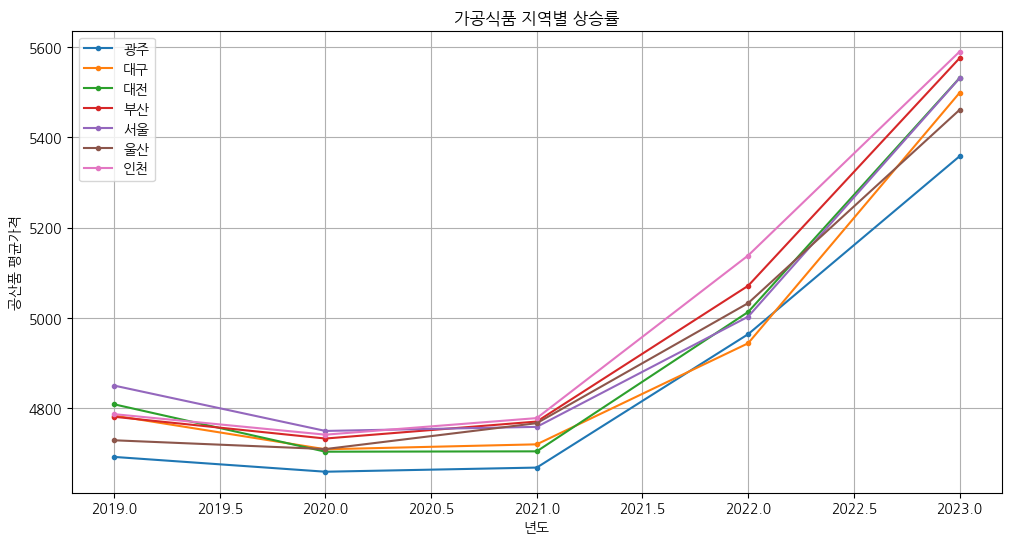

In [773]:
plt.figure(figsize=(12,6))
for i in range(len(list_year)):
    plt.plot(range(2019,2024), list_year[i],marker='.', label=place_name[i])
plt.title('가공식품 지역별 상승률')
plt.xlabel('년도')
plt.ylabel('공산품 평균가격')
plt.legend()
plt.grid()
plt.show()

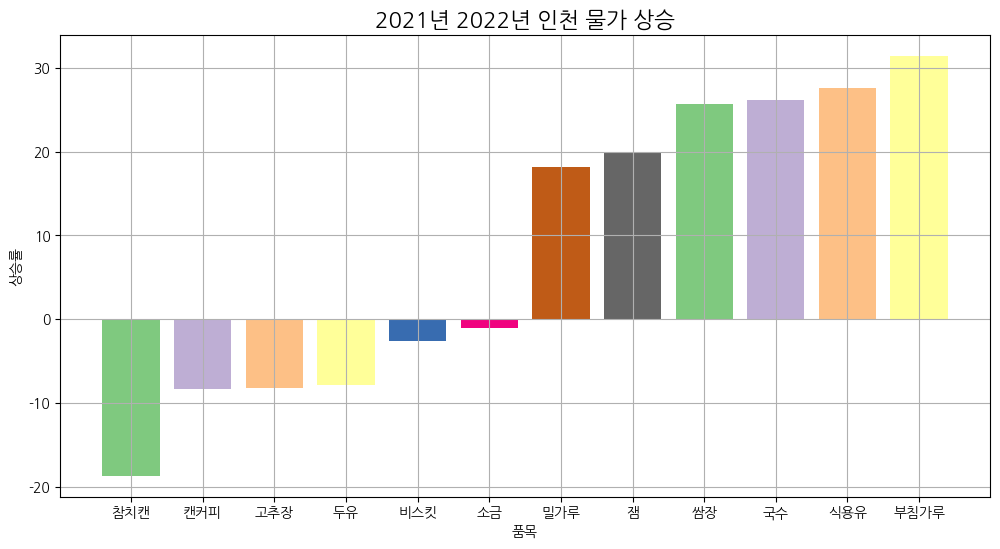

In [774]:
data2022_incheon = data[(data['year'] == 2021) & (data['city_name'] == '인천')][['category_name','avg_price']].set_index('category_name')
data2023_incheon = data[(data['year'] == 2022) & (data['city_name'] == '인천')][['category_name','avg_price']].set_index('category_name')
data_incheon = (data2023_incheon['avg_price'] - data2022_incheon['avg_price']) / data2022_incheon['avg_price'] * 100
data_incheon = data_incheon.dropna().sort_values()
data_incheon = data_incheon.drop(index=data_incheon.index[6:-6]).to_dict()
colors = sns.color_palette('Accent',len(data_incheon.keys()))
plt.figure(figsize=(12,6))
plt.bar(data_incheon.keys(), data_incheon.values(), color=colors)
plt.title('2021년 2022년 인천 물가 상승', fontsize=16)
plt.xlabel('품목')
plt.ylabel('상승률')
plt.grid()
plt.show()

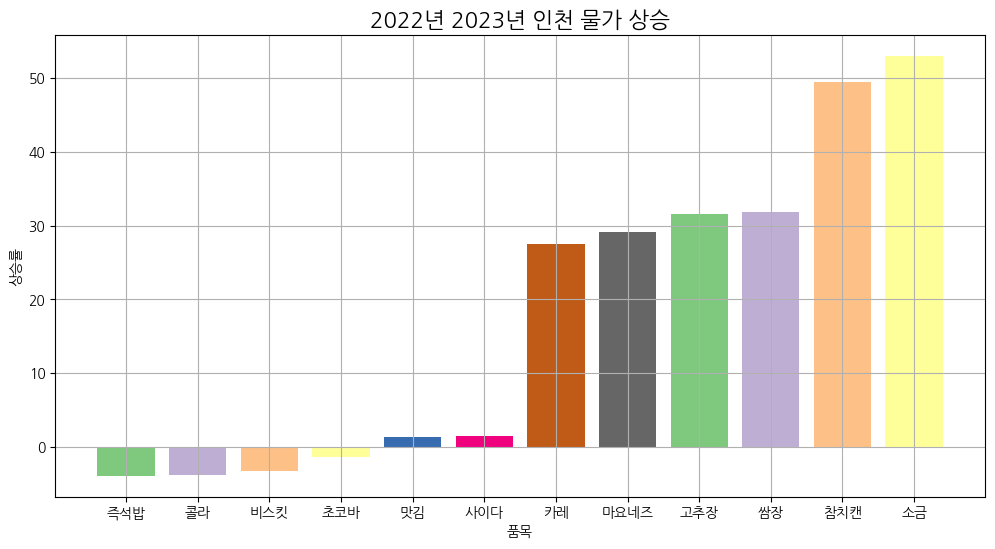

In [775]:
data2022_incheon = data[(data['year'] == 2022) & (data['city_name'] == '인천')][['category_name','avg_price']].set_index('category_name')
data2023_incheon = data[(data['year'] == 2023) & (data['city_name'] == '인천')][['category_name','avg_price']].set_index('category_name')
data_incheon = (data2023_incheon['avg_price'] - data2022_incheon['avg_price']) / data2022_incheon['avg_price'] * 100
data_incheon = data_incheon.dropna().sort_values()
data_incheon = data_incheon.drop(index=data_incheon.index[6:-6]).to_dict()
colors = sns.color_palette('Accent',len(data_incheon.keys()))
plt.figure(figsize=(12,6))
plt.bar(data_incheon.keys(), data_incheon.values(), color=colors)
plt.title('2022년 2023년 인천 물가 상승', fontsize=16)
plt.xlabel('품목')
plt.ylabel('상승률')
plt.grid()
plt.show()

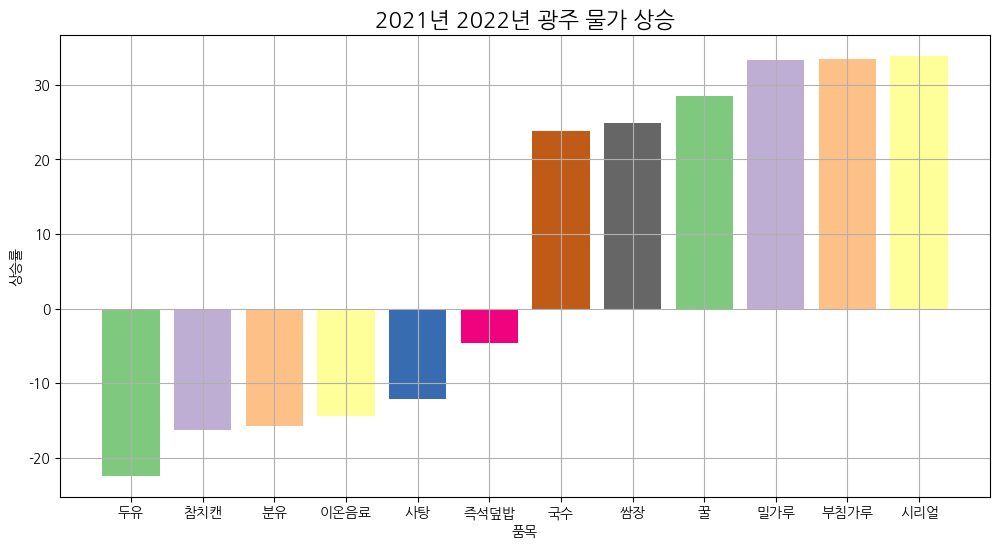

In [776]:
data2022_incheon = data[(data['year'] == 2021) & (data['city_name'] == '광주')][['category_name','avg_price']].set_index('category_name')
data2023_incheon = data[(data['year'] == 2022) & (data['city_name'] == '광주')][['category_name','avg_price']].set_index('category_name')
data_incheon = (data2023_incheon['avg_price'] - data2022_incheon['avg_price']) / data2022_incheon['avg_price'] * 100
data_incheon = data_incheon.dropna().sort_values()
data_incheon = data_incheon.drop(index=data_incheon.index[6:-6]).to_dict()
colors = sns.color_palette('Accent',len(data_incheon.keys()))
plt.figure(figsize=(12,6))
plt.bar(data_incheon.keys(), data_incheon.values(), color=colors)
plt.title('2021년 2022년 광주 물가 상승', fontsize=16)
plt.xlabel('품목')
plt.ylabel('상승률')
plt.grid()
plt.show()

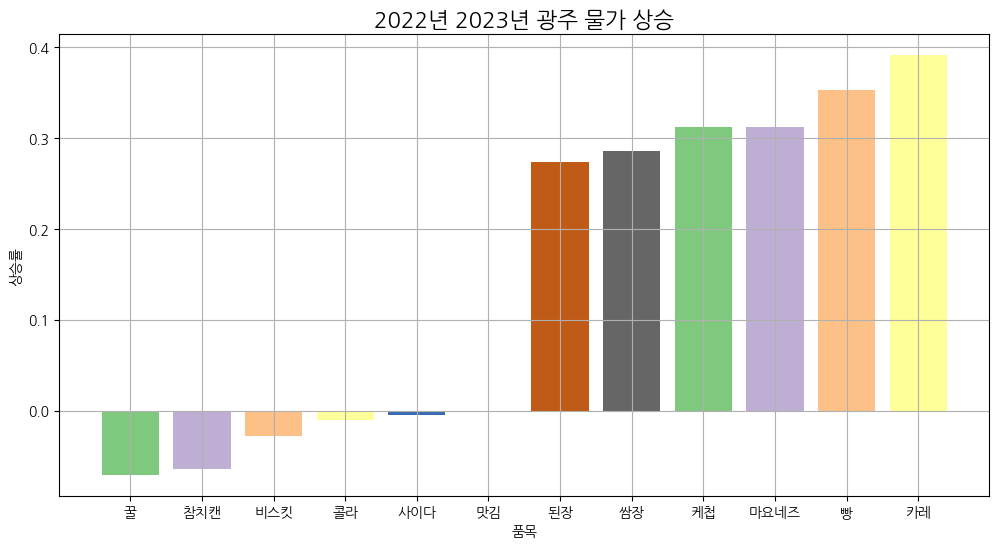

avg_price    1731
Name: 소금, dtype: int64

In [777]:
data2022_incheon = data[(data['year'] == 2022) & (data['city_name'] == '광주')][['category_name','avg_price']].set_index('category_name')
data2023_incheon = data[(data['year'] == 2023) & (data['city_name'] == '광주')][['category_name','avg_price']].set_index('category_name')
data_incheon =(data2023_incheon['avg_price'] - data2022_incheon['avg_price']) / data2022_incheon['avg_price']
data_incheon = data_incheon.dropna().sort_values()
data_incheon = data_incheon.drop(index=data_incheon.index[6:-6]).to_dict()
colors = sns.color_palette('Accent',len(data_incheon.keys()))
plt.figure(figsize=(12,6))
plt.bar(data_incheon.keys(), data_incheon.values(), color=colors)
plt.title('2022년 2023년 광주 물가 상승', fontsize=16)
plt.xlabel('품목')
plt.ylabel('상승률')
plt.grid()
plt.show()
data2023_incheon.loc['소금']

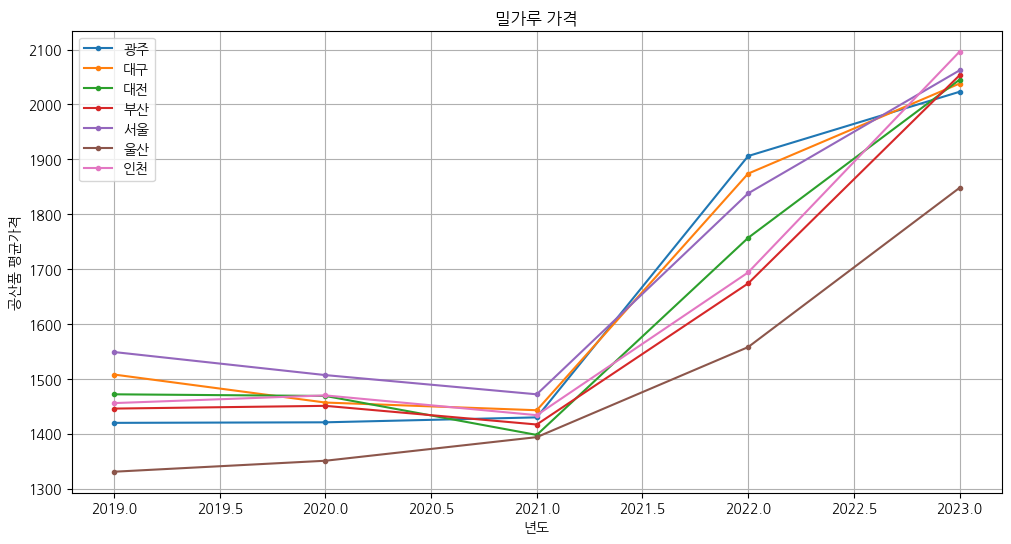

In [778]:
winedata = data[data['category_name'] == '밀가루'][['city_name','year','avg_price']].set_index(['city_name','year']).sort_index(ascending=True)
wine_dict = {}
place_names = winedata.index.levels[0].to_list()
for name in place_names:
    wine_dict[name] = winedata.loc[name]['avg_price'].to_list()

plt.figure(figsize=(12,6))
for key, row in wine_dict.items():
    plt.plot(range(2019,2024), row, marker='.', label=key)
plt.title('밀가루 가격')
plt.xlabel('년도')
plt.ylabel('공산품 평균가격')
plt.legend()
plt.grid()
plt.show()

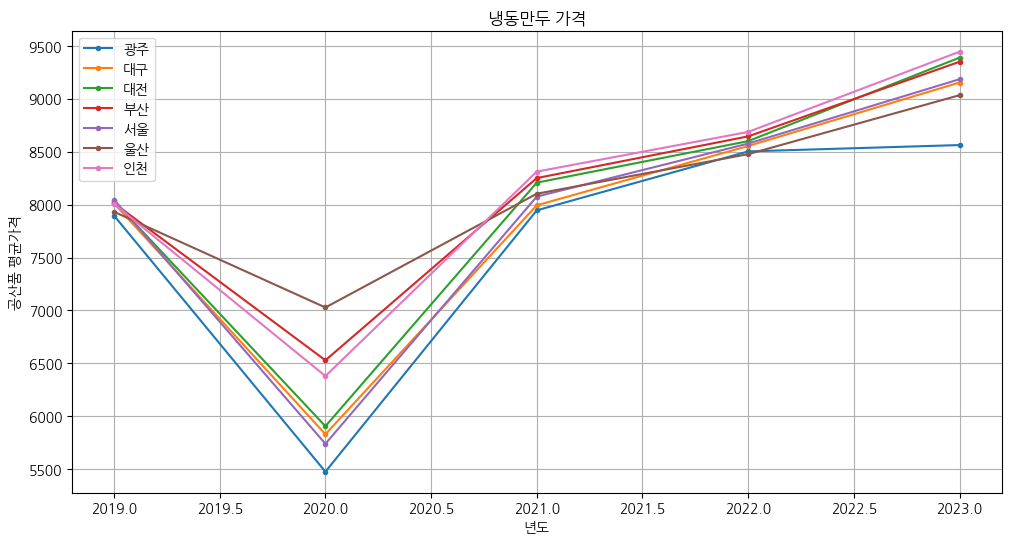

In [779]:
winedata = data[data['category_name'] == '냉동만두'][['city_name','year','avg_price']].set_index(['city_name','year']).sort_index(ascending=True)
wine_dict = {}
place_names = winedata.index.levels[0].to_list()
for name in place_names:
    wine_dict[name] = winedata.loc[name]['avg_price'].to_list()

plt.figure(figsize=(12,6))
for key, row in wine_dict.items():
    plt.plot(range(2019,2024), row, marker='.', label=key)
plt.title('냉동만두 가격')
plt.xlabel('년도')
plt.ylabel('공산품 평균가격')
plt.legend()
plt.grid()
plt.show()

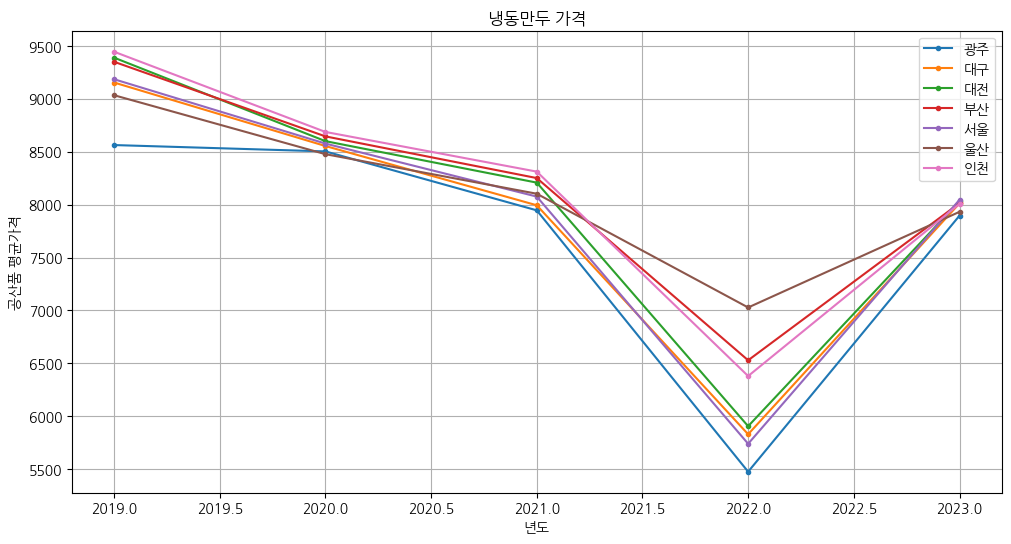

In [780]:
winedata = data[data['category_name'] == '냉동만두'][['city_name','year','avg_price']].set_index(['city_name','year'])
wine_dict = {}
place_names = winedata.index.levels[0].to_list()
for name in place_names:
    wine_dict[name] = winedata.loc[name]['avg_price'].to_list()

plt.figure(figsize=(12,6))
for key, row in wine_dict.items():
    plt.plot(range(2019,2024), row, marker='.', label=key)
plt.title('냉동만두 가격')
plt.xlabel('년도')
plt.ylabel('공산품 평균가격')
plt.legend()
plt.grid()
plt.show()

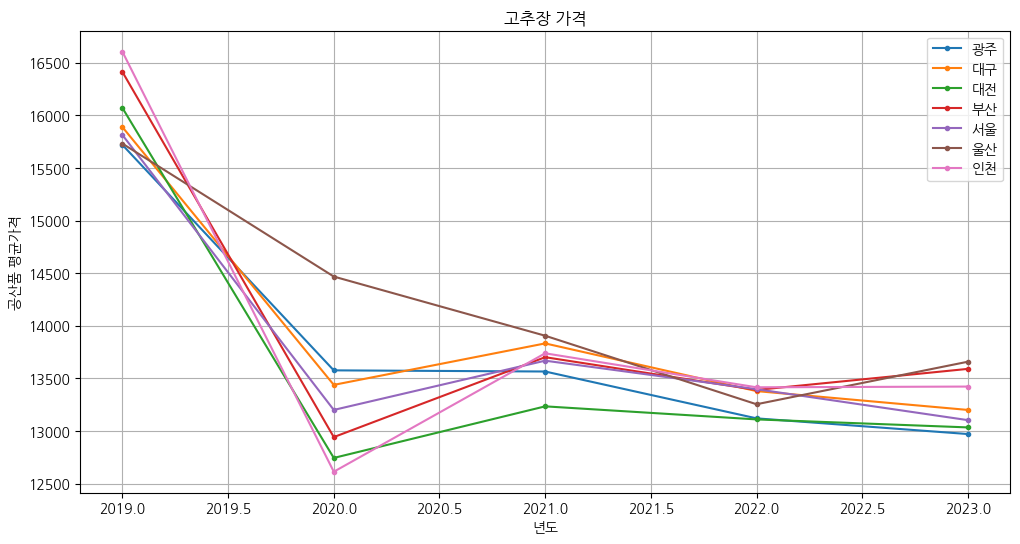

In [781]:
winedata = data[data['category_name'] == '고추장'][['city_name','year','avg_price']].set_index(['city_name','year'])
wine_dict = {}
place_names = winedata.index.levels[0].to_list()
for name in place_names:
    wine_dict[name] = winedata.loc[name]['avg_price'].to_list()

plt.figure(figsize=(12,6))
for key, row in wine_dict.items():
    plt.plot(range(2019,2024), row, marker='.', label=key)
plt.title('고추장 가격')
plt.xlabel('년도')
plt.ylabel('공산품 평균가격')
plt.legend()
plt.grid()
plt.show()

In [782]:
sql = '''
select na.product_name, pr.product_price, pr.year
from product_price_tb pr
left join product_name_tb na
on pr.product_id = na.product_id
left join product_category_tb ct 
on na.category_id = ct.category_id
left join product_type_tb tp
on ct.type_id = tp.type_id
left join city_tb ci
on pr.city_id = ci.city_id
where tp.type_id = 'A' and pr.product_price <> 0 and ct.category_name = '밀가루' and ci.city_name='인천' and
pr.product_id in (select product_id from product_price_tb group by product_id, city_id having count(*) > 4)
'''
cur.execute(sql)
rows = cur.fetchall()
data = pd.DataFrame(rows)

In [783]:
keys = data.groupby('product_name').sum().index.to_list()
data_dict = {}
for key in keys:
    data_dict[key] = []
for r in rows:
    idx = keys.index(r['product_name'])
    data_dict[keys[idx]].append(r['product_price'])
data

,product_name,product_price,year
0,곰표 밀가루 중력다목적용(1kg),1456,2019
1,곰표 밀가루 중력다목적용(1kg),1470,2020
2,곰표 밀가루 중력다목적용(1kg),1434,2021
3,곰표 밀가루 중력다목적용(1kg),1694,2022
4,곰표 밀가루 중력다목적용(1kg),2096,2023


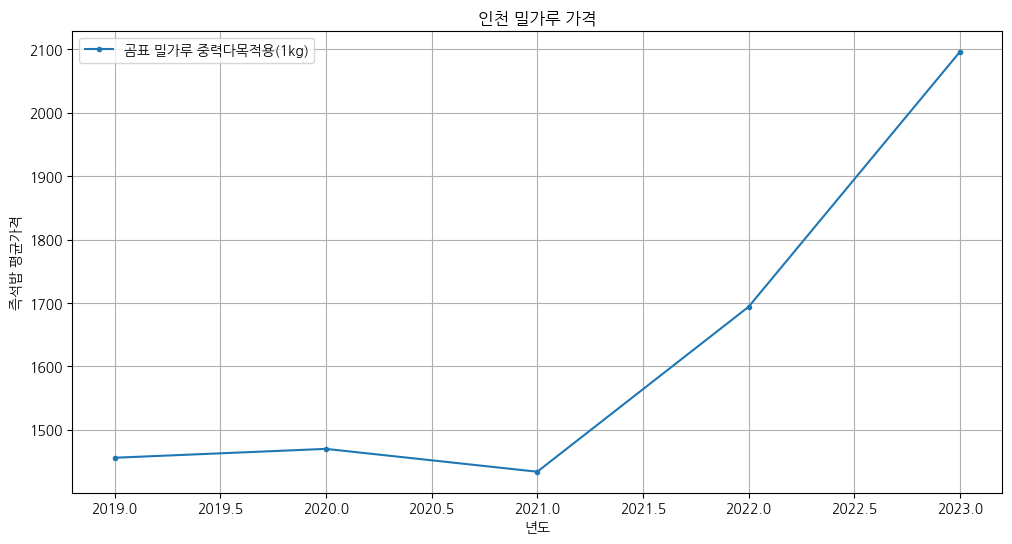

In [784]:
plt.figure(figsize=(12,6))
for key,val in data_dict.items():
    plt.plot(range(2019,2019+len(val)), val, marker='.', label=key)
plt.title('인천 밀가루 가격')
plt.xlabel('년도')
plt.ylabel('즉석밥 평균가격')
plt.legend()
plt.grid()
plt.show()


In [785]:
sql = '''
select na.product_name, pr.product_price, pr.year
from product_price_tb pr
left join product_name_tb na
on pr.product_id = na.product_id
left join product_category_tb ct 
on na.category_id = ct.category_id
left join product_type_tb tp
on ct.type_id = tp.type_id
left join city_tb ci
on pr.city_id = ci.city_id
where tp.type_id = 'A' and pr.product_price <> 0 and ct.category_name = '부침가루' and ci.city_name='인천' and
pr.product_id in (select product_id from product_price_tb group by product_id, city_id having count(*) > 4)
'''
cur.execute(sql)
rows = cur.fetchall()
data = pd.DataFrame(rows)

In [786]:
keys = data.groupby('product_name').sum().index.to_list()
data_dict = {}
for key in keys:
    data_dict[key] = []
for r in rows:
    idx = keys.index(r['product_name'])
    data_dict[keys[idx]].append(r['product_price'])


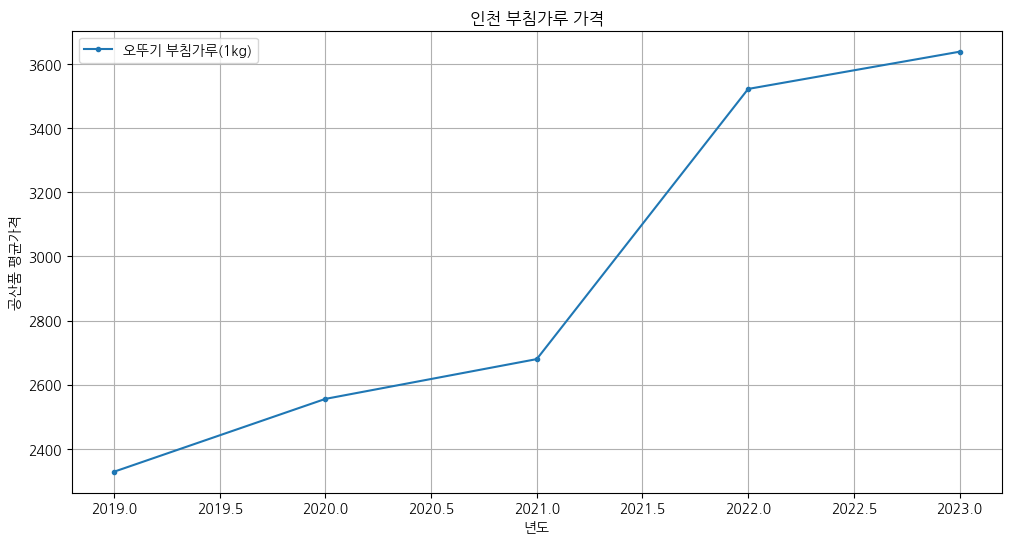

In [787]:
plt.figure(figsize=(12,6))
for key,val in data_dict.items():
    if len(val) > 4 :
        plt.plot(range(2019,2019+len(val)), val, marker='.', label=key)
plt.title('인천 부침가루 가격')
plt.xlabel('년도')
plt.ylabel('공산품 평균가격')
plt.legend()
plt.grid()
plt.show()
